In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, random_split
import torchvision.datasets as datasets
import os
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams['axes.grid'] = True

In [58]:
roots = [2.2691853142129728, 2.104982167992544, 1.932307699120554, 1.749339162933206, 1.5536238493280832, 1.34187327905057, 1.109960313758399, 0.8541630993606272, 0.5762735442012712, 0.2885386111960936, 0.03198372863548067]
jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
get_crit_T = dict(zip(jds, roots))
num_temps = 50
T = np.linspace(0.03, 3.5, num_temps)

In [30]:
Jd = 0.0
T_c = get_crit_T[Jd]

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)

L = 40
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_40 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_40 = np.load(f)     


In [31]:
def errs(errs):
    return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

def stds_err(errs):
    return np.array([np.std(errs[i*512:(i+1)*512]) for i in range(num_temps)])

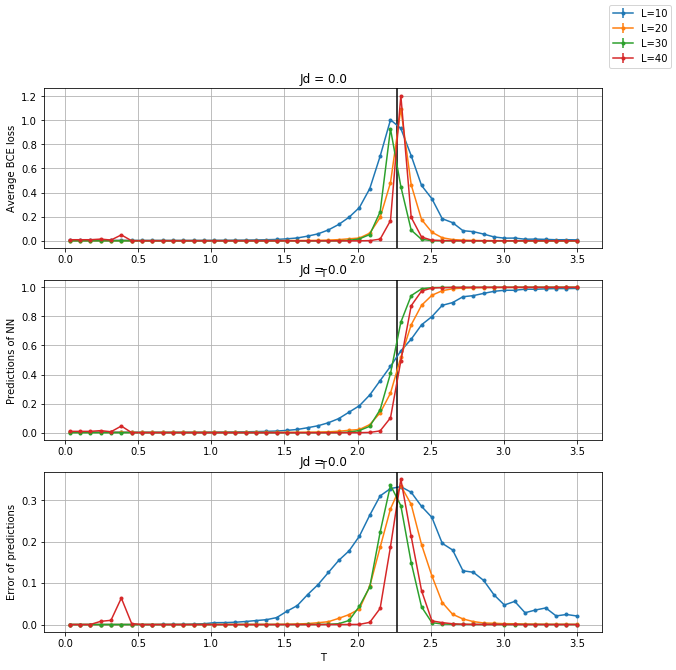

In [32]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10', c='C0')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20', c='C1')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30', c='C2')
ax[0].errorbar(T, errs(errs_40), yerr=stds_err(errs_40)/1000, marker='.', label='L=40', c='C3')
#ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60', c='C3')
#ax[0].errorbar(T, errs(errs_40), yerr=stds_err(errs_40)/1000, marker='.', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')
ax[1].errorbar(T, errs(outs_40), yerr=stds_err(outs_40)/1000, marker='.')
#ax[1].errorbar(T, errs(outs_40), yerr=stds_err(outs_40)/1000, marker='.')

ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T, stds_err(outs_30), marker='.')
ax[2].plot(T, stds_err(outs_40), marker='.')
#ax[2].plot(T, stds_err(outs_40), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = 0.0')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

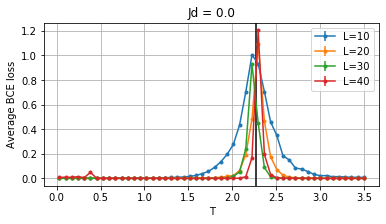

In [39]:
plt.errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
plt.errorbar(T, errs(errs_40), yerr=stds_err(errs_40)/1000, marker='.', label='L=40')
#plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')

plt.rcParams["figure.figsize"] = (3,6)

plt.title('Jd = 0.0')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/00_50_bce.png')

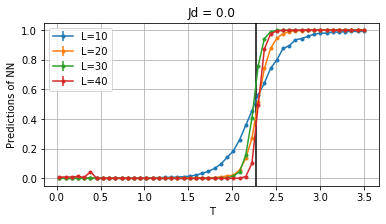

In [43]:
plt.errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', label='L=30')
plt.errorbar(T, errs(outs_40), yerr=stds_err(outs_40)/1000, marker='.', label='L=40')
plt.rcParams["figure.figsize"] = (6,6)
plt.title('Jd = 0.0')
plt.xlabel('T')
plt.ylabel('Predictions of NN')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/00_50_pred.png')

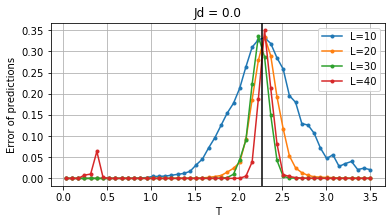

In [46]:
plt.plot(T, stds_err(outs_10), marker='.', label='L=10')
plt.plot(T, stds_err(outs_20), marker='.', label='L=20')
plt.plot(T, stds_err(outs_30), marker='.', label='L=30')
plt.plot(T, stds_err(outs_40), marker='.', label='L=40')
plt.rcParams["figure.figsize"] = (6,3)
plt.title('Jd = 0.0')
plt.xlabel('T')
plt.ylabel('Error of predictions')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/00_50_ep.png')

In [107]:
######## -0.3 ########

In [47]:
Jd = -0.3

T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 40
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_40 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_40 = np.load(f) 


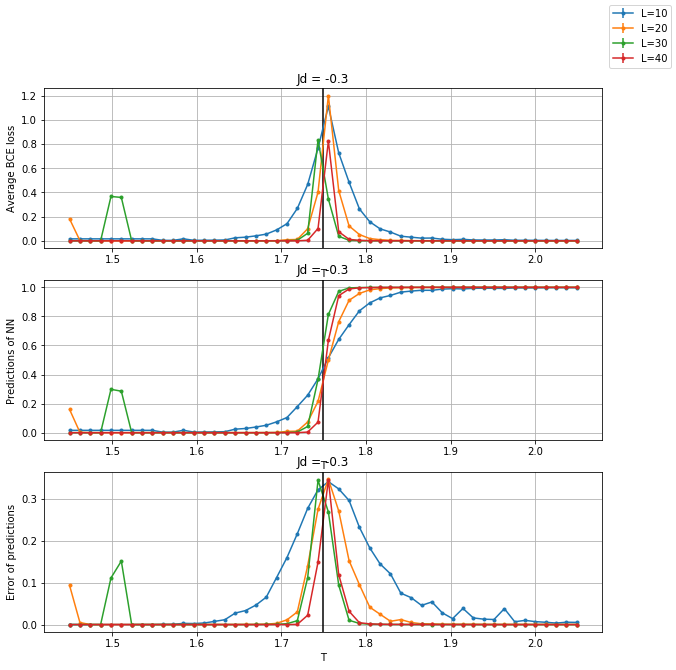

In [48]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
ax[0].errorbar(T, errs(errs_40), yerr=stds_err(errs_40)/1000, marker='.', label='L=40')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')
ax[1].errorbar(T, errs(outs_40), yerr=stds_err(outs_40)/1000, marker='.')

ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T, stds_err(outs_30), marker='.')
ax[2].plot(T, stds_err(outs_40), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.3')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

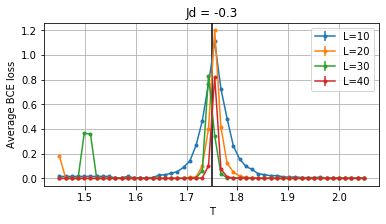

In [52]:
plt.errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
plt.errorbar(T, errs(errs_40), yerr=stds_err(errs_40)/1000, marker='.', label='L=40')

plt.title('Jd = -0.3')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/03_50_bce.png')

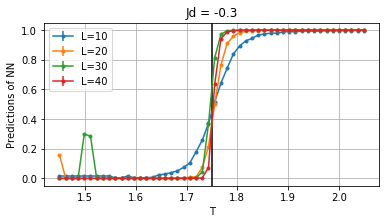

In [53]:
plt.errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', label='L=30')
plt.errorbar(T, errs(outs_40), yerr=stds_err(outs_40)/1000, marker='.', label='L=40')

plt.title('Jd = -0.3')
plt.xlabel('T')
plt.ylabel('Predictions of NN')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/03_50_pred.png')

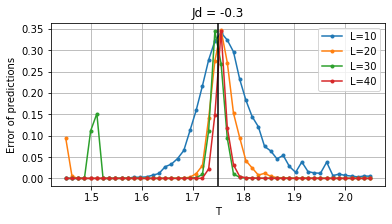

In [55]:
plt.plot(T, stds_err(outs_10), marker='.', label='L=10')
plt.plot(T, stds_err(outs_20), marker='.', label='L=20')
plt.plot(T, stds_err(outs_30), marker='.', label='L=30')
plt.plot(T, stds_err(outs_40), marker='.', label='L=40')

plt.title('Jd = -0.3')
plt.xlabel('T')
plt.ylabel('Error of predictions')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/03_50_ep.png')

In [113]:
######## -0.5 #########

In [59]:
Jd = -0.5

T_c = get_crit_T[Jd]

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)

L = 40
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_40 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_40 = np.load(f)

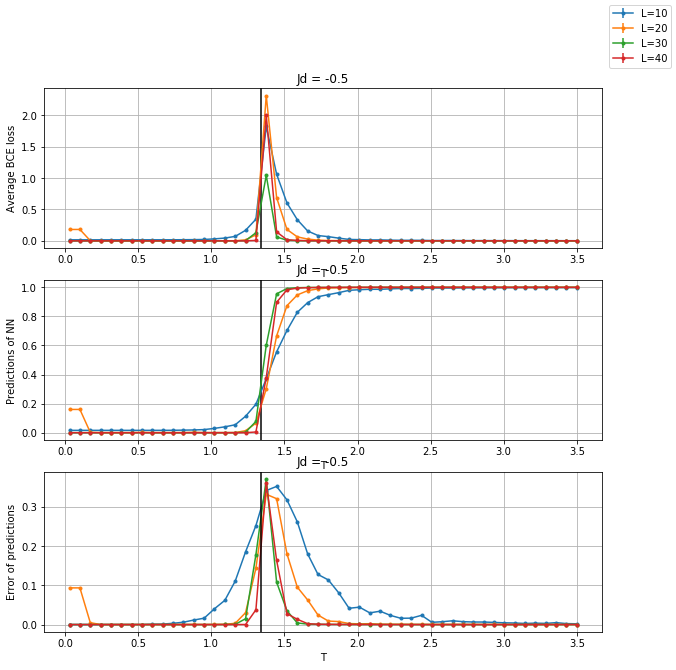

In [60]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
ax[0].errorbar(T, errs(errs_40), yerr=stds_err(errs_40)/1000, marker='.', label='L=40')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')
ax[1].errorbar(T, errs(outs_40), yerr=stds_err(outs_40)/1000, marker='.')

ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T, stds_err(outs_30), marker='.')
ax[2].plot(T, stds_err(outs_40), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.5')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

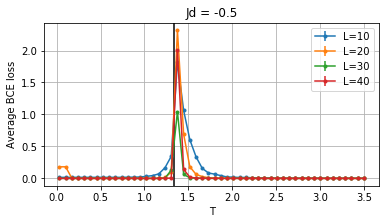

In [61]:
plt.errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
plt.errorbar(T, errs(errs_40), yerr=stds_err(errs_40)/1000, marker='.', label='L=40')

plt.title('Jd = -0.5')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/05_50_bce.png')

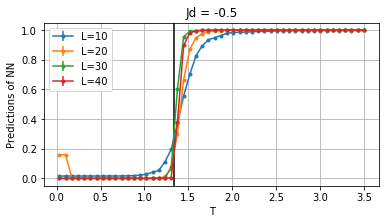

In [62]:
plt.errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', label='L=30')
plt.errorbar(T, errs(outs_40), yerr=stds_err(outs_40)/1000, marker='.', label='L=40')

plt.title('Jd = -0.5')
plt.xlabel('T')
plt.ylabel('Predictions of NN')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/05_50_pred.png')

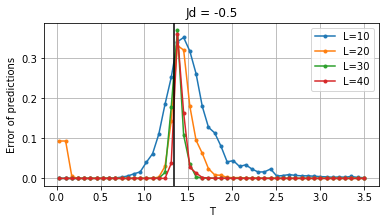

In [63]:
plt.plot(T, stds_err(outs_10), marker='.', label='L=10')
plt.plot(T, stds_err(outs_20), marker='.', label='L=20')
plt.plot(T, stds_err(outs_30), marker='.', label='L=30')
plt.plot(T, stds_err(outs_40), marker='.', label='L=40')

plt.title('Jd = -0.5')
plt.xlabel('T')
plt.ylabel('Error of predictions')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/05_50_ep.png')

In [119]:
####### -0.7 ########

In [64]:
Jd = -0.7

T_c = get_crit_T[Jd]

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)

L = 40
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_40 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_40 = np.load(f)

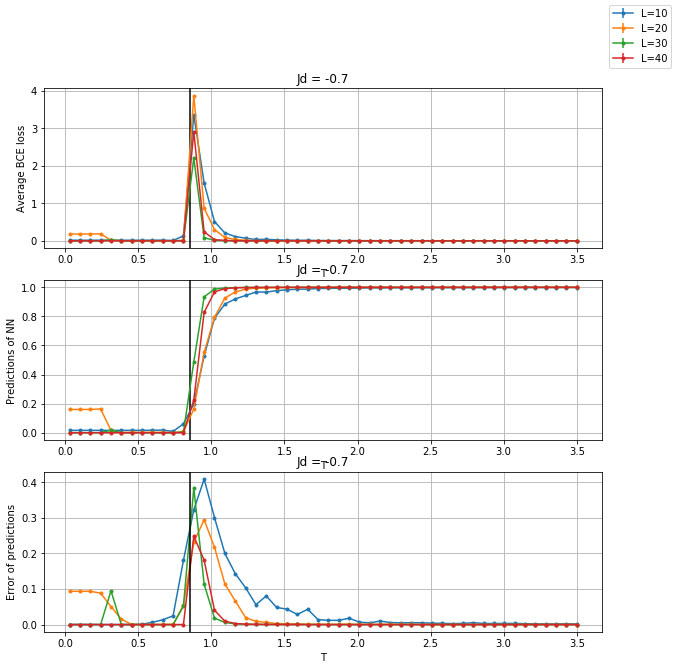

In [65]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
ax[0].errorbar(T, errs(errs_40), yerr=stds_err(errs_40)/1000, marker='.', label='L=40')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')
ax[1].errorbar(T, errs(outs_40), yerr=stds_err(outs_40)/1000, marker='.')

ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T, stds_err(outs_30), marker='.')
ax[2].plot(T, stds_err(outs_40), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.7')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

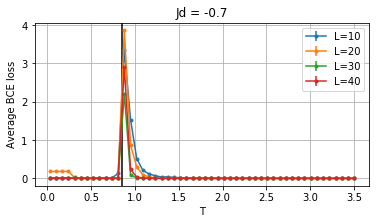

In [66]:
plt.errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
plt.errorbar(T, errs(errs_40), yerr=stds_err(errs_40)/1000, marker='.', label='L=40')

plt.title('Jd = -0.7')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/07_50_bce.png')

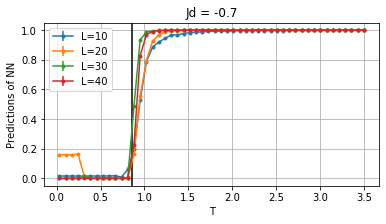

In [67]:
plt.errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', label='L=30')
plt.errorbar(T, errs(outs_40), yerr=stds_err(outs_40)/1000, marker='.', label='L=40')

plt.title('Jd = -0.7')
plt.xlabel('T')
plt.ylabel('Predictions of NN')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/07_50_pred.png')

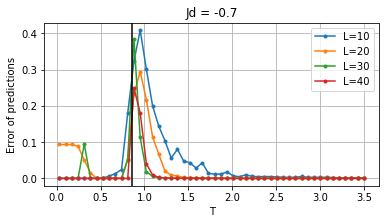

In [68]:
plt.plot(T, stds_err(outs_10), marker='.', label='L=10')
plt.plot(T, stds_err(outs_20), marker='.', label='L=20')
plt.plot(T, stds_err(outs_30), marker='.', label='L=30')
plt.plot(T, stds_err(outs_40), marker='.', label='L=40')

plt.title('Jd = -0.7')
plt.xlabel('T')
plt.ylabel('Error of predictions')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/07_50_ep.png')

In [125]:
####### -0.9 ##########

In [69]:
Jd = -0.9

T_c = get_crit_T[Jd]

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 40
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_40 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_40 = np.load(f)

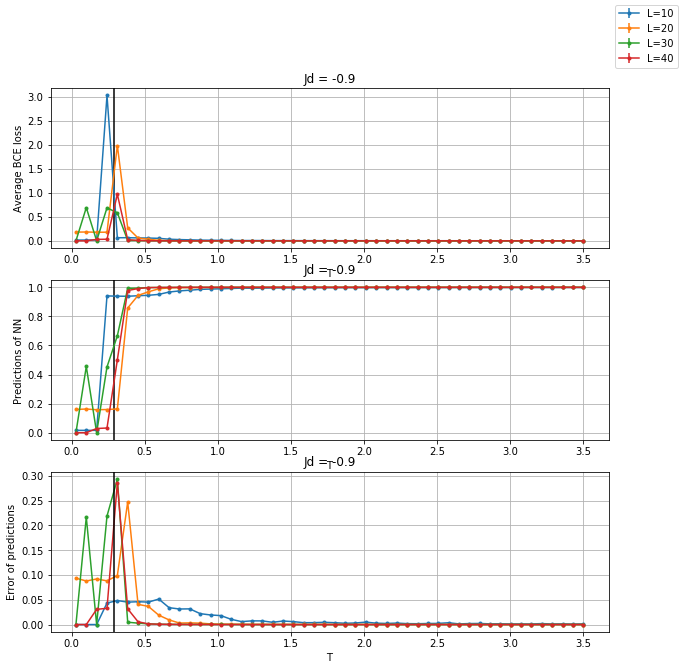

In [70]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
ax[0].errorbar(T, errs(errs_40), yerr=stds_err(errs_40)/1000, marker='.', label='L=40')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')
ax[1].errorbar(T, errs(outs_40), yerr=stds_err(outs_40)/1000, marker='.')

ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T, stds_err(outs_30), marker='.')
ax[2].plot(T, stds_err(outs_40), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.9')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

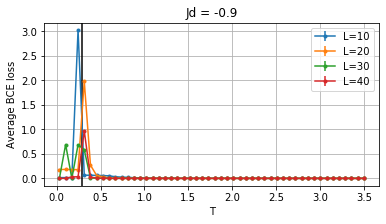

In [71]:
plt.errorbar(T[T>0], errs(errs_10)[T>0], yerr=stds_err(errs_10)[T>0]/1000, marker='.', label='L=10')
plt.errorbar(T[T>0], errs(errs_20)[T>0], yerr=stds_err(errs_20)[T>0]/1000, marker='.', label='L=20')
plt.errorbar(T[T>0], errs(errs_30)[T>0], yerr=stds_err(errs_30)[T>0]/1000, marker='.', label='L=30')
plt.errorbar(T[T>0], errs(errs_40)[T>0], yerr=stds_err(errs_40)[T>0]/1000, marker='.', label='L=40')

plt.title('Jd = -0.9')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/09_50_bce.png')

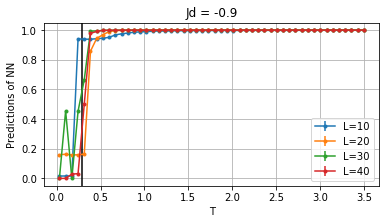

In [72]:
plt.errorbar(T[T>0], errs(outs_10)[T>0], yerr=stds_err(outs_10)[T>0]/1000, marker='.', label='L=10')
plt.errorbar(T[T>0], errs(outs_20)[T>0], yerr=stds_err(outs_20)[T>0]/1000, marker='.', label='L=20')
plt.errorbar(T[T>0], errs(outs_30)[T>0], yerr=stds_err(outs_30)[T>0]/1000, marker='.', label='L=30')
plt.errorbar(T[T>0], errs(outs_40)[T>0], yerr=stds_err(outs_40)[T>0]/1000, marker='.', label='L=40')

plt.title('Jd = -0.9')
plt.xlabel('T')
plt.ylabel('Predictions of NN')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/09_50_pred.png')

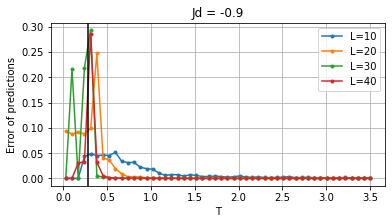

In [73]:
plt.plot(T[T>0], stds_err(outs_10)[T>0], marker='.', label='L=10')
plt.plot(T[T>0], stds_err(outs_20)[T>0], marker='.', label='L=20')
plt.plot(T[T>0], stds_err(outs_30)[T>0], marker='.', label='L=30')
plt.plot(T[T>0], stds_err(outs_40)[T>0], marker='.', label='L=40')

plt.title('Jd = -0.9')
plt.xlabel('T')
plt.ylabel('Error of predictions')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/09_50_ep.png')